# What is the distribution of left-handed versus right-handed players?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

home_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/home_team_parquet"):
    single_stats = pd.read_parquet("raw/home_team_parquet/" + file)
    home_team_dataframe = pd.concat([home_team_dataframe, single_stats], axis= 'rows', ignore_index=True)

away_team_dataframe = pd.DataFrame()
for file in os.listdir("raw/away_team_parquet"):
    single_stats = pd.read_parquet("raw/away_team_parquet/" + file)
    away_team_dataframe = pd.concat([away_team_dataframe, single_stats], axis= 'rows', ignore_index=True)




In [2]:
home_team_dataframe['plays'] = home_team_dataframe['plays'].str.title()
away_team_dataframe['plays'] = away_team_dataframe['plays'].str.title()

# استخراج داده‌های ستون plays از هر دو جدول
home_plays = home_team_dataframe[['plays']].copy()
away_plays = away_team_dataframe[['plays']].copy()

# ترکیب داده‌ها
all_plays = pd.concat([home_plays, away_plays])

# شمارش تعداد بازیکنان راست‌دست و چپ‌دست
distribution = all_plays['plays'].value_counts()

# نمایش توزیع بازیکنان
print("Distribution of left-handed vs right-handed players:")
print(distribution)


Distribution of left-handed vs right-handed players:
plays
Right-Handed    312
Left-Handed      46
Name: count, dtype: int64


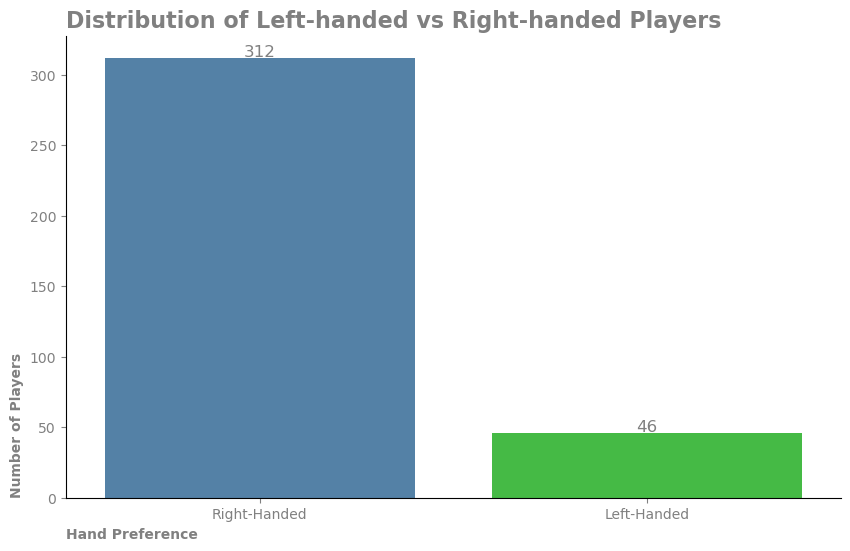

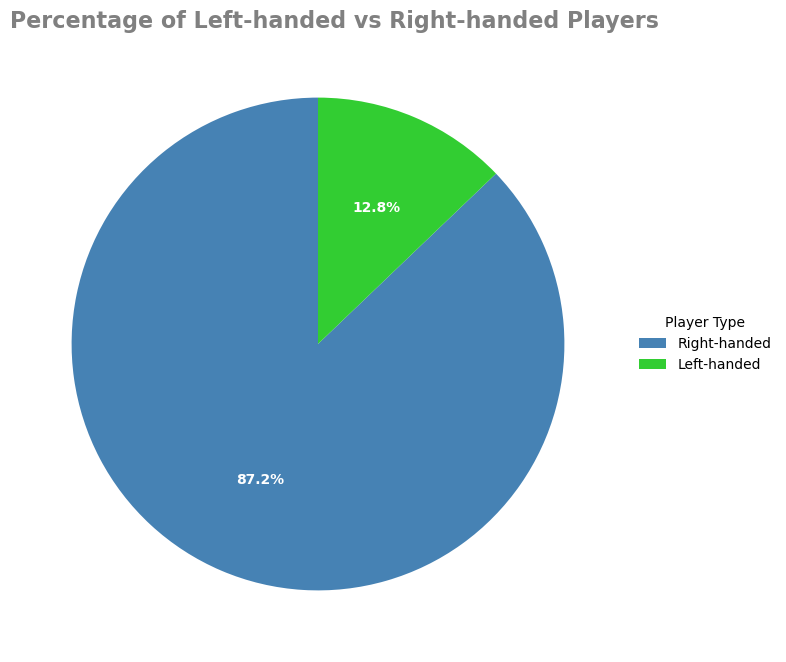

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# استخراج داده‌های ستون plays از هر دو جدول
home_plays = home_team_dataframe[['plays']].copy()
away_plays = away_team_dataframe[['plays']].copy()

# ترکیب داده‌ها
all_plays = pd.concat([home_plays, away_plays])

# شمارش تعداد بازیکنان راست‌دست و چپ‌دست
distribution = all_plays['plays'].value_counts()

# رنگ‌های مورد نظر
colors = ['#4682b4', '#32cd32']  

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=distribution.index, y=distribution.values, palette=colors)

# افزودن عدد دقیق روی هر ستون
for index, value in enumerate(distribution.values):
    plt.text(index, value + 1, str(value), color='gray', ha="center", fontsize=12)

plt.title('Distribution of Left-handed vs Right-handed Players', fontsize=16, color='gray', loc='left', fontweight='bold')
plt.xlabel('Hand Preference', fontsize=10, color='gray', loc = 'left', fontweight='bold')
plt.ylabel('Number of Players', fontsize=10, color='gray', loc='bottom', fontweight='bold')
plt.tick_params(colors='gray')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.show()

# رسم نمودار دایره‌ای
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(distribution.values, autopct='%1.1f%%', startangle=90, colors=['#4682b4', '#32cd32'])
plt.title('Percentage of Left-handed vs Right-handed Players', fontsize=16, color='gray', loc='left', fontweight='bold')
# اضافه کردن legend
plt.legend(wedges, ['Right-handed', 'Left-handed'], title="Player Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=False)

# تنظیم رنگ و فونت درصدها
plt.setp(autotexts, color="white", fontweight="bold")

plt.show()


This bar chart shows the distribution of left-handed versus right-handed players. Here are some key takeaways:

1. **Right-handed Players**: There is a significantly larger number of right-handed players, with a total of 312 players.
2. **Left-handed Players**: In contrast, the number of left-handed players is much smaller, at 46.

#### Analysis:
- **Dominance of Right-handed Players**: The overwhelming majority of players are right-handed, making up a large portion of the sample. This is consistent with general population statistics, where the majority of people are right-handed.

- **Significant Difference**: The difference between left-handed and right-handed players is quite stark. Right-handed players outnumber left-handed players by a ratio of about 7:1.
This imbalance could be attributed to natural handedness distribution in the general population. However, it could also impact strategies in tennis since left-handed players are often considered to have an advantage due to the relative rarity, which can create different angles and shot patterns that opponents are less accustomed to.